# <p style="text-align: center;">Data Fusion Project 2 - Problem – Life Insurance</p>

Importar Bibiliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## I. Preparação e Análise dos Dados

Fazer upload dos dados e organizar as suas colunas num dataframe

In [2]:
columns = ['GD', 'AGE', 'MS', 'DEP', 'PS', 'CD', 'SAL', 'SUGGESTION']
df = pd.read_csv('lifeInsurance.txt', delimiter='\s+')
df.columns = columns

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_556\270478125.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('lifeInsurance.txt', delimiter='\s+')


In [3]:
df.head()

,GD,AGE,MS,DEP,PS,CD,SAL,SUGGESTION
0,0.0,101.0,1.0,3.0,1.0,1.0,3132.2018,1.0
1,0.0,34.0,1.0,3.0,1.0,1.0,2462.3115,1.0
2,0.0,34.0,0.0,1.0,1.0,1.0,3051.9166,0.0
3,0.0,93.0,1.0,2.0,1.0,1.0,2401.4440,1.0
4,0.0,34.0,0.0,1.0,2.0,1.0,3406.0609,0.0


In [4]:
df.describe()

,GD,AGE,MS,DEP,PS,CD,SAL,SUGGESTION
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.141903,61.984975,0.535893,1.497496,0.924875,0.577629,2602.316117,0.322204
std,0.349242,21.734752,0.499127,1.124184,0.683806,0.614948,691.352864,0.467711
min,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,1370.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,2041.698500,0.000000
50%,0.000000,60.000000,1.000000,1.000000,1.000000,1.000000,2604.503000,0.000000
75%,0.000000,82.000000,1.000000,3.000000,1.000000,1.000000,3161.502600,1.000000
max,1.000000,101.000000,1.000000,3.000000,2.000000,2.000000,3800.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GD          599 non-null    float64
 1   AGE         599 non-null    float64
 2   MS          599 non-null    float64
 3   DEP         599 non-null    float64
 4   PS          599 non-null    float64
 5   CD          599 non-null    float64
 6   SAL         599 non-null    float64
 7   SUGGESTION  599 non-null    float64
dtypes: float64(8)
memory usage: 37.6 KB


In [6]:
# Regra de calculo da pontuação de risco
def calculate_risk_score(row):
    # Pontuação por idade
    age = row['AGE']
    if age < 30:
        age_score = 5
    elif age <= 40:
        age_score = 10
    elif age <= 50:
        age_score = 15
    else:
        age_score = 20

    # Pontuação por condição de saúde (CD)
    if row['CD'] == 0:
        health_score = 5
    elif row['CD'] == 1:
        health_score = 10
    else:  # CD == 2
        health_score = 15

    # Pontuação por salário (SAL)
    salary = row['SAL']
    if salary > 3500:
        salary_score = 5
    elif salary >= 1700:
        salary_score = 10
    else:
        salary_score = 15

    # Pontuação por dependentes (DEP)
    dep = row['DEP']
    if dep == 0:
        dep_score = 5
    elif dep == 1:
        dep_score = 10
    else:
        dep_score = 15

    # Soma total de risco
    total_score = age_score + health_score + salary_score + dep_score
    return total_score

# Calcular a pontuação de risco
df['RISK_SCORE'] = df.apply(calculate_risk_score, axis=1)

# Gerar a sugestão com base no score

df['SUGGESTION'] = df['RISK_SCORE'].apply(lambda x: 
    1 if x > 50 else 
    0)

# eliminar a coluna de pontuação de risco
df.drop(columns=['RISK_SCORE'], inplace=True)



1 - é recomendado comprar seguro de vida
0 - não é necessário comprar seguro de vida

In [7]:
discretas = ['GD', 'MS', 'DEP','PS', 'CD']
continuas = ['AGE', 'SAL']

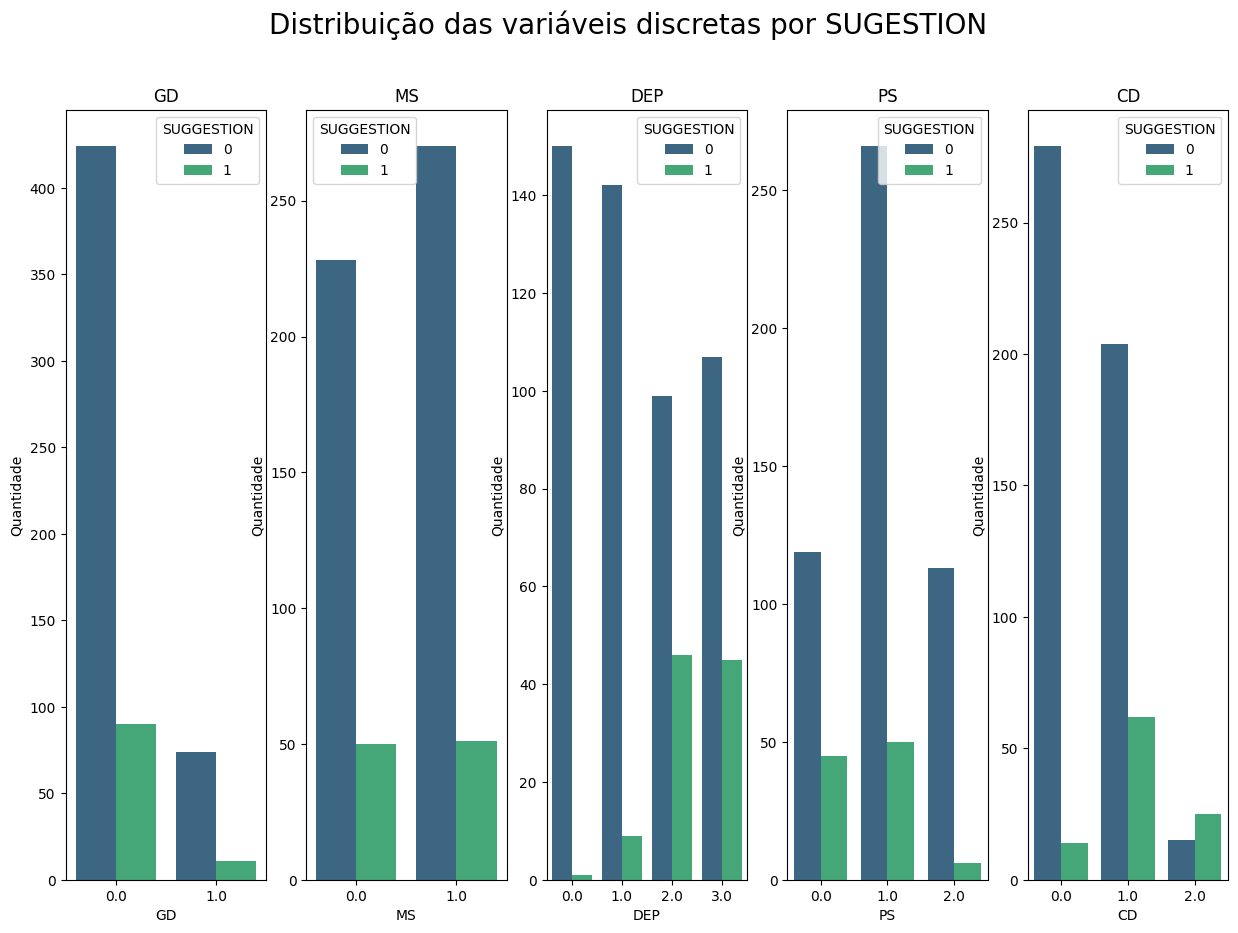

In [8]:
# distribuição das variáveis discretas por Sugestao
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
fig.suptitle('Distribuição das variáveis discretas por SUGESTION', fontsize=20)
for i, ax in enumerate(axs.flat):
    sns.countplot(x=discretas[i], hue='SUGGESTION', data=df, ax=ax, palette='viridis')
    ax.set_title(discretas[i])
    ax.set_xlabel(discretas[i])
    ax.set_ylabel('Quantidade')
plt.show()


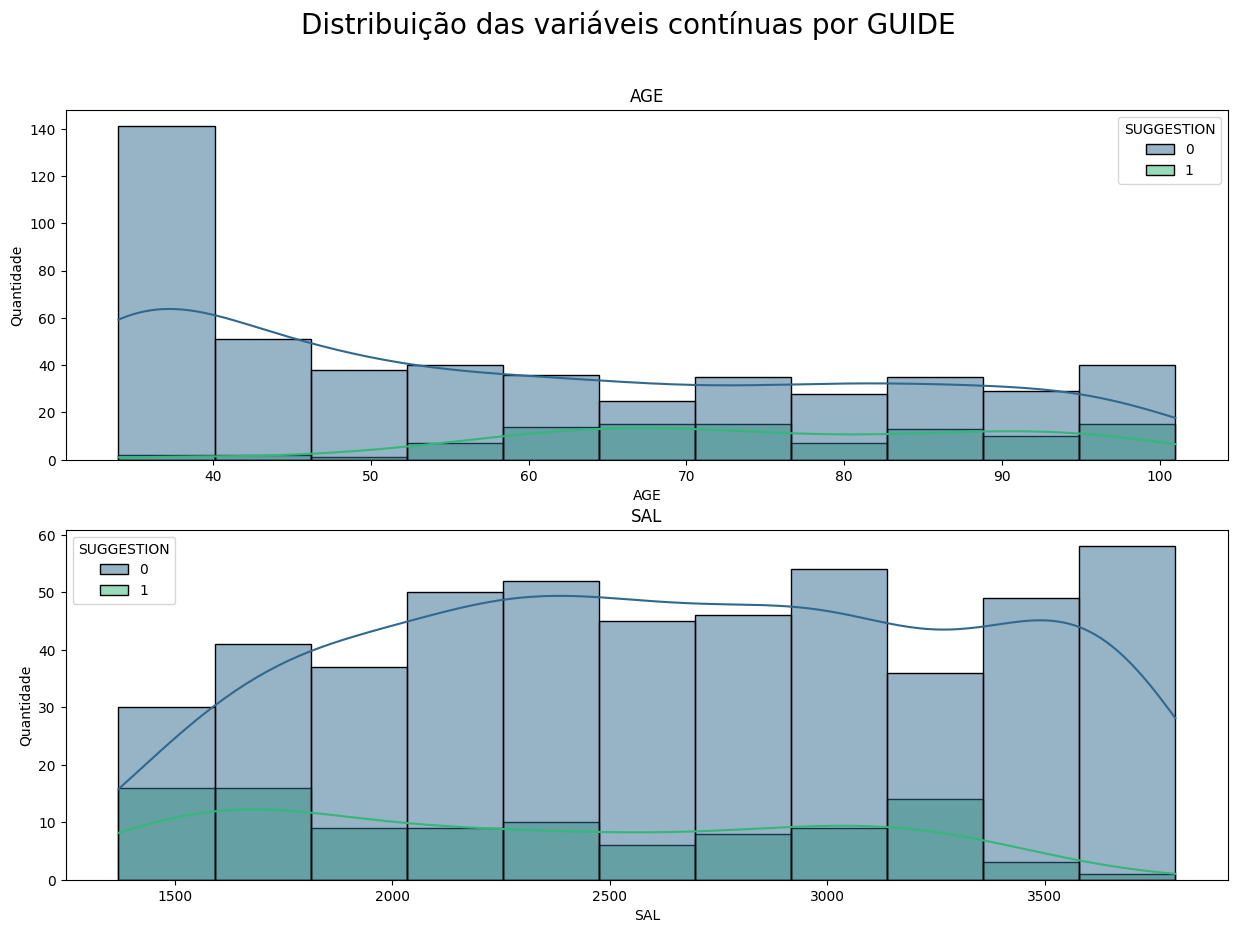

In [9]:
# Avaliar a distribuição das variáveis contínuas
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Distribuição das variáveis contínuas por GUIDE', fontsize=20)
for var, ax in zip(continuas, axs.flat):
    sns.histplot(x=var, hue='SUGGESTION', data=df, ax=ax, kde=True, palette='viridis')
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Quantidade')

### Testes de Normalidade para verificar as variáveis que seguem distribuição normal e aferir se influenciam a probabilidade Condicional

Vamos usar Shapiro-Wilk, Q-Q plot e teste de Kolmogorov-Smirnov

Q-Q plot- compara a distribuição dos dados com uma distribuição normal(teórica):

* Forma da Linha Diagonal:

O Q-Q plot é plotado com os quantis observados (nossos dados) no eixo vertical e os quantis esperados (distribuição teórica, como a normal) no eixo horizontal.
Se os pontos no gráfico se aproximam da linha diagonal (y = x), isso sugere que os dados têm uma distribuição semelhante à distribuição teórica.

* Desvios da Linha Diagonal:

Desvios significativos da linha diagonal podem indicar que os nossos dados não seguem a distribuição teórica. Por exemplo, se os pontos no Q-Q plot se desviam da linha diagonal de maneira sistemática (curvatura ou inclinação), isso sugere que a distribuição dos dados é diferente da distribuição normal.

* Outliers ou Pontos Extremos:

Outliers ou pontos extremos no Q-Q plot podem indicar a presença de valores atípicos (outliers) nos dados. Esses valores podem afetar a interpretação da normalidade dos dados.

Variável: AGE
Teste de Shapiro-Wilk: ShapiroResult(statistic=0.9194901741331037, pvalue=2.447185756355851e-17)
Distribuição não normal de acordo com Shapiro-Wilk
Teste de Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34.0, statistic_sign=-1)
Distribuição não normal de acordo com Kolmogorov-Smirnov


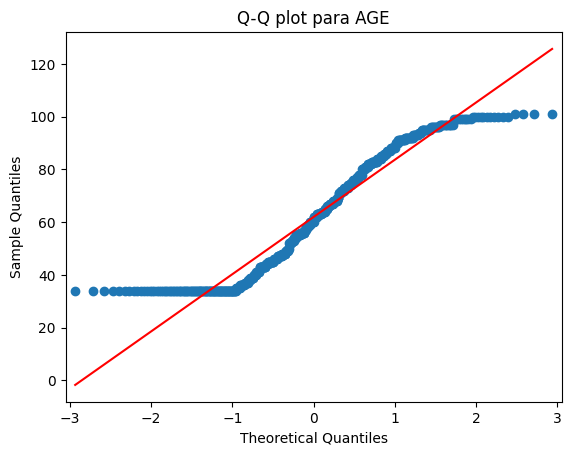

Variável: SAL
Teste de Shapiro-Wilk: ShapiroResult(statistic=0.9589646552639949, pvalue=7.0887133106482495e-12)
Distribuição não normal de acordo com Shapiro-Wilk
Teste de Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1370.0, statistic_sign=-1)
Distribuição não normal de acordo com Kolmogorov-Smirnov


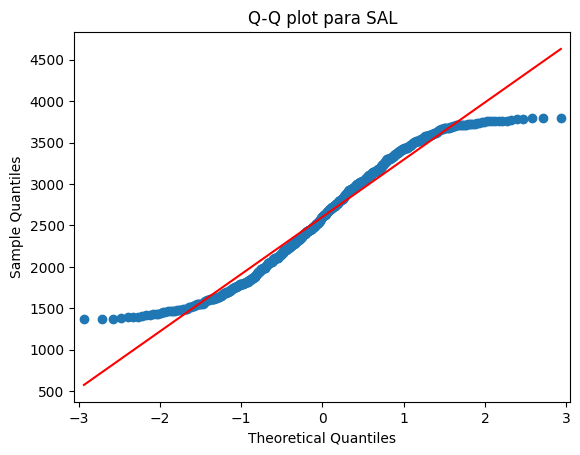

In [10]:
from scipy.stats import shapiro,kstest
from statsmodels.graphics.gofplots import qqplot

# fazer teste de Shapiro-Wilk, Q-Q plot e teste de Kolmogorov-Smirnov
for col in continuas:
    print(f'Variável: {col}')
    print(f'Teste de Shapiro-Wilk: {shapiro(df[col])}')
    if shapiro(df[col])[1] > 0.05:
        print('Distribuição normal de acordo com Shapiro-Wilk')
    else:
        print('Distribuição não normal de acordo com Shapiro-Wilk')
    print(f'Teste de Kolmogorov-Smirnov: {kstest(df[col], cdf="norm")}')
    if kstest(df[col], cdf="norm")[1] > 0.05:
        print('Distribuição normal de acordo com Kolmogorov-Smirnov')
    else:
        print('Distribuição não normal de acordo com Kolmogorov-Smirnov')
    qqplot(df[col], line='s')
    plt.title(f'Q-Q plot para {col}')
    plt.show()




Resultados:
* Ao visualizar o histograma, tanto a idade como o salário apresentam uma distribuição nao normal.

Criar bayesian model que tem em conta a features com distribuição nao normal e bayesian model que não tem isso em conta

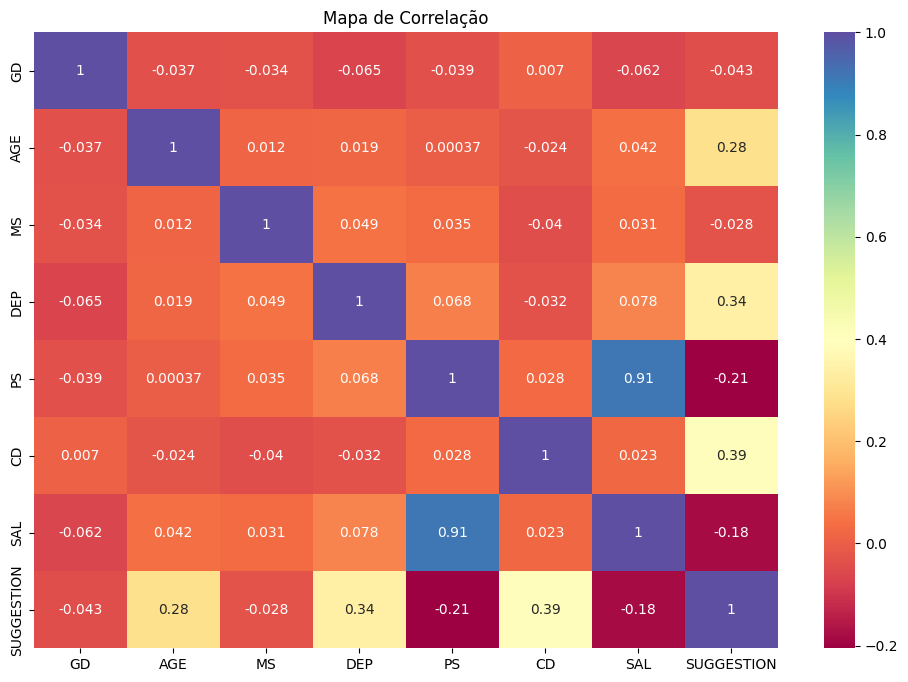

In [11]:
# Avaliar a correlação entre as variáveis
# Matriz de correlação
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.title('Mapa de Correlação')
plt.show()


* idade,cd, dependentes -> os que melhor se correlacionam com o target
* genero, marital status, salario e ps-> os que menos se correlacionam com o target
* salario e ps, as mais correlacionadas .> redundância, provavelmente n são necessárias as duas.

Usar esta informação nos testes de importância das features

Ver se alguma coluna contem valores em falta

In [12]:
nan_columns = df.columns[df.isnull().any()].tolist()
print("Colunas com valores Nan", nan_columns)

Colunas com valores Nan []


Vamos colocar como int valores que vem com casas decimais com zeros à direita, arredondar para 1 casa a idade, visto poder ser usada como int mas poder ter algum interesse tendo uma casa decimal para ter mais noção da idade da pessoa (sem casas decimais, alguém com 40 anos e 11 meses estaria mais longe de alguem com 41 anos certos do que de alguem com 40 anos certos, questão que eliminamos com a casa decimal), e arredondamos com 3 casas decimais as outras colunas com valores contínuos

In [13]:
for col in ['GD', 'MS', 'DEP','PS', 'CD', 'SUGGESTION']:
    df[col] = df[col].astype(int)

for col in ['SAL']:
    df[col] = np.round(df[col], 3)

for col in ['AGE']:
    df[col] = np.round(df[col], 1)
df.head()

,GD,AGE,MS,DEP,PS,CD,SAL,SUGGESTION
0,0,101.0,1,3,1,1,3132.202,1
1,0,34.0,1,3,1,1,2462.312,0
2,0,34.0,0,1,1,1,3051.917,0
3,0,93.0,1,2,1,1,2401.444,1
4,0,34.0,0,1,2,1,3406.061,0


In [14]:
counts = df['SUGGESTION'].value_counts()
print(counts)


SUGGESTION
0    498
1    101
Name: count, dtype: int64


Segundo a sugestao de comprar seguro de vida, 498 pessoas não necessitariam de comprar seguro de vida e 101 seriam recomendadas a comprar

## II. Implementação do modelo de Classificação

* 1. Tendo em conta normalidade da distribuição- de acordo com suposição de normalidade -> de acordo com testes de normalidade age e salary não são gaussianas
* 2. Não tendo em conta testes de normalidade:
    * todas as variáveis discretizadas
    * todas as variáveis tratadas como não gaussianas
    

### II.a Performance do classificador 
* Modelo 1- trata a variável 'age' e 'sal' como não Gaussianas e lida com outras variáveis contínuas de forma adequada (discretizando-as).
* Modelo 2- trata todas as variáveis contínuas da mesma forma-> discretiza-as.
* Modelo 3 - trata todas as variáveis contínuas como gaussianas.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir os dados em treino e teste
X = df.drop('SUGGESTION', axis=1)
y = df['SUGGESTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Definir as colunas
discrete_cols = ['GD', 'MS', 'DEP','PS', 'CD']
continuous_non_normal_cols = ['SAL', 'AGE']
continuous_normal_cols = []
continuous_cols =  continuous_non_normal_cols + continuous_normal_cols

In [17]:
class CustomBayesClassifier:
    def __init__(self, discrete_cols, continuous_normal_cols, continuous_non_normal_cols, num_bins=15):
        self.class_priors = {}
        self.feature_params = {}
        self.label_encoders = {}
        self.discrete_cols = discrete_cols
        self.continuous_normal_cols = continuous_normal_cols
        self.continuous_non_normal_cols = continuous_non_normal_cols
        self.num_bins = num_bins

    def fit(self, X, y):
        #priors
        unique_classes, class_counts = np.unique(y, return_counts=True)
        self.class_priors = {c: count / len(y) for c, count in zip(unique_classes, class_counts)}

        # Separate features by class
        self.feature_params = {c: {} for c in unique_classes}
        for c in unique_classes:
            X_c = X[y == c]
            for col in X.columns:
                if self.discrete_cols is not None and col in self.discrete_cols:
                    # Discrete 
                    values, counts = np.unique(X_c[col], return_counts=True)
                    self.feature_params[c][col] = {'values': values, 'counts': counts / len(X_c)}
                elif self.continuous_normal_cols is not None and col in self.continuous_normal_cols:
                    # Continuous - Gausssian assumption
                    mean = X_c[col].mean()
                    var = X_c[col].var()
                    self.feature_params[c][col] = {'mean': mean, 'var': var}
                elif self.continuous_non_normal_cols is not None and col in self.continuous_non_normal_cols:
                    # Discretize continuous feature
                    bins = np.linspace(X[col].min(), X[col].max(), self.num_bins + 1)
                    digitized = np.digitize(X_c[col], bins) - 1
                    values, counts = np.unique(digitized, return_counts=True)
                    self.feature_params[c][col] = {'values': values, 'counts': counts / len(X_c), 'bins': bins}

    def _calculate_likelihood(self, x, class_label):
        likelihood = 1
        for col in x.index:
            if self.discrete_cols is not None and col in self.discrete_cols:
                # Discrete
                values = self.feature_params[class_label][col]['values']
                counts = self.feature_params[class_label][col]['counts']
                if x[col] in values:
                    likelihood *= counts[np.where(values == x[col])[0][0]]
                else:
                    alpha = 0.01  # Valor de suavização
                    likelihood *= alpha  # Lidstone smoothing  # Smoothing for unseen values
            elif self.continuous_normal_cols is not None and col in self.continuous_normal_cols:
                # Continuous feature with Gaussian assumption
                mean = self.feature_params[class_label][col]['mean']
                var = self.feature_params[class_label][col]['var']
                # Gaussian probability density function
                numerator = np.exp(-((x[col] - mean) ** 2) / (2 * var))
                denominator = np.sqrt(2 * np.pi * var)
                likelihood *= numerator / denominator
            elif self.continuous_non_normal_cols is not None and col in self.continuous_non_normal_cols:
                # Discretized continuous feature
                bins = self.feature_params[class_label][col]['bins']
                digitized = np.digitize([x[col]], bins) - 1
                values = self.feature_params[class_label][col]['values']
                counts = self.feature_params[class_label][col]['counts']
                if digitized[0] in values:
                    likelihood *= counts[np.where(values == digitized[0])[0][0]]
                else:
                    alpha = 0.01  # Valor de suavização
                    likelihood *= alpha  # Lidstone smoothing
        return likelihood

    def predict(self, X):
        predictions = []
        for _, x in X.iterrows():
            posteriors = {}
            for c in self.class_priors:
                prior = self.class_priors[c]
                likelihood = self._calculate_likelihood(x, c)
                posteriors[c] = prior * likelihood
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)


Modelo 1

In [18]:
model1 = CustomBayesClassifier(discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

print("Modelo 1:")
evaluate_model(y_test, y_pred1)

Modelo 1:
Accuracy: 0.9111111111111111
Precision: 1.0
Recall: 0.5428571428571428
F1 Score: 0.7037037037037037


Modelo 2

In [19]:
class GeneralHybridBayesClassifier(CustomBayesClassifier):
    def __init__(self, discrete_cols, continuous_cols, num_bins=10):
        super().__init__(discrete_cols, None, continuous_cols, num_bins)

    def fit(self, X, y):
        super().fit(X, y)


In [20]:
model2 = GeneralHybridBayesClassifier(discrete_cols, continuous_cols)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')


print("Modelo 2:")
evaluate_model(y_test, y_pred2)

Modelo 2:
Accuracy: 0.8833333333333333
Precision: 0.8888888888888888
Recall: 0.45714285714285713
F1 Score: 0.6037735849056604


Modelo 3

In [21]:
# Treinamento e avaliação do modelo
model_3 = CustomBayesClassifier(discrete_cols, continuous_cols, None)
model_3.fit(X_train, y_train)
y_pred3 = model_3.predict(X_test)
# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')
    acuracy3 = accuracy_score(y_true, y_pred)
    precision3 = precision_score(y_true, y_pred)
    recall3 = recall_score(y_true, y_pred)
    f1_score3 = f1_score(y_true, y_pred)
    return acuracy3, precision3, recall3, f1_score3
    

print("Performance do Modelo 3:")
evaluate_model(y_test, y_pred3)


Performance do Modelo 3:
Accuracy: 0.8888888888888888
Precision: 0.8947368421052632
Recall: 0.4857142857142857
F1 Score: 0.6296296296296297


(0.8888888888888888,
 0.8947368421052632,
 0.4857142857142857,
 0.6296296296296297)

#### Resultados:

C:\Users\User\AppData\Local\Temp\ipykernel_556\3616417481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)], palette='viridis')


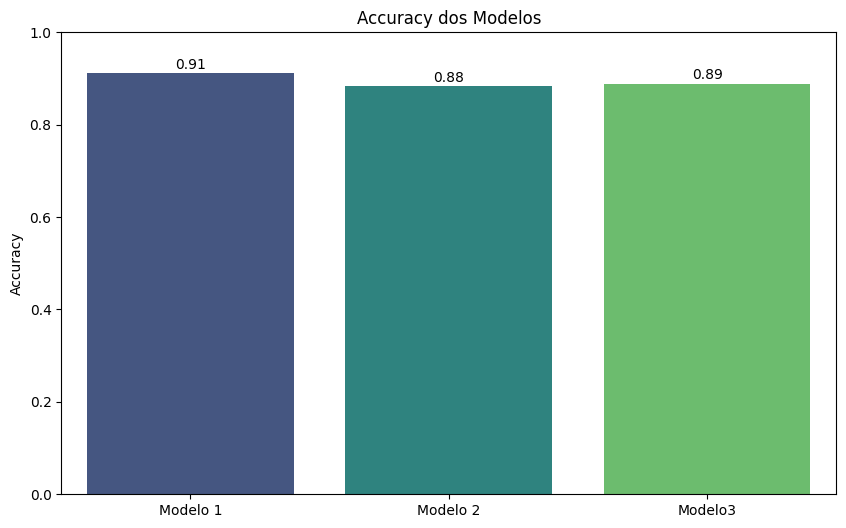

In [22]:
# plotar accuracy modelo1 vs modelo2
# paleta viridis
plt.figure(figsize=(10, 6))
sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)], palette='viridis')
plt.title('Accuracy dos Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_556\3035358712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)], palette='viridis')


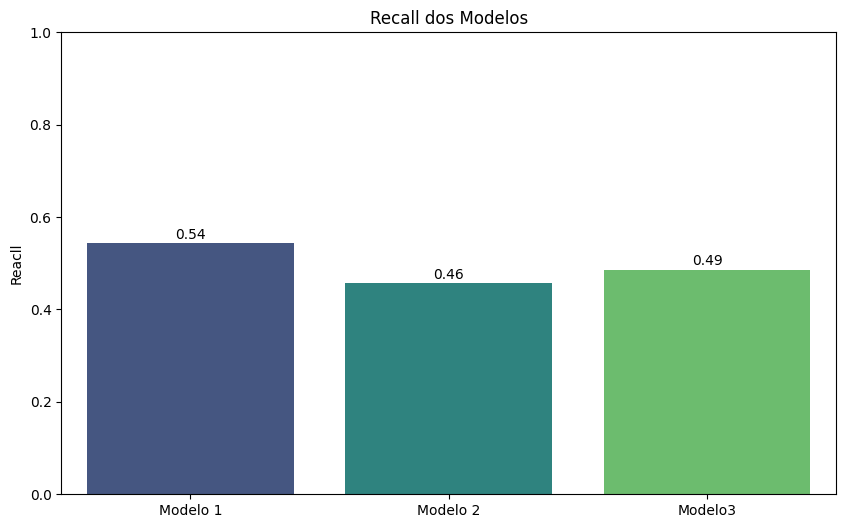

In [23]:
# plotar recall  modelo1 vs modelo2 vs Modeo3
# paleta viridis
plt.figure(figsize=(10, 6))
sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)], palette='viridis')
plt.title('Recall dos Modelos')
plt.ylabel('Reacll')
plt.ylim(0, 1)
for i, v in enumerate([recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

### II.b Testar importância das variáveis (usar ou não todas) - tirar as com menos correlação com target

Initial Model Performance:
Accuracy: 0.9111111111111111
Precision: 1.0
Recall: 0.5428571428571428
F1 Score: 0.7037037037037037
Evaluating model without column: GD
Evaluating model without column: MS
Evaluating model without column: DEP
Evaluating model without column: PS
Evaluating model without column: CD
Evaluating model without column: SAL
Evaluating model without column: AGE
Ablation Study Results:
Without column GD:
  Accuracy: 0.9111111111111111
  Precision: 1.0
  Recall: 0.5428571428571428
  F1: 0.7037037037037037
Without column MS:
  Accuracy: 0.9111111111111111
  Precision: 1.0
  Recall: 0.5428571428571428
  F1: 0.7037037037037037
Without column DEP:
  Accuracy: 0.85
  Precision: 0.7222222222222222
  Recall: 0.37142857142857144
  F1: 0.49056603773584906
Without column PS:
  Accuracy: 0.8888888888888888
  Precision: 1.0
  Recall: 0.42857142857142855
  F1: 0.6
Without column CD:
  Accuracy: 0.85
  Precision: 0.7222222222222222
  Recall: 0.37142857142857144
  F1: 0.49056603773584

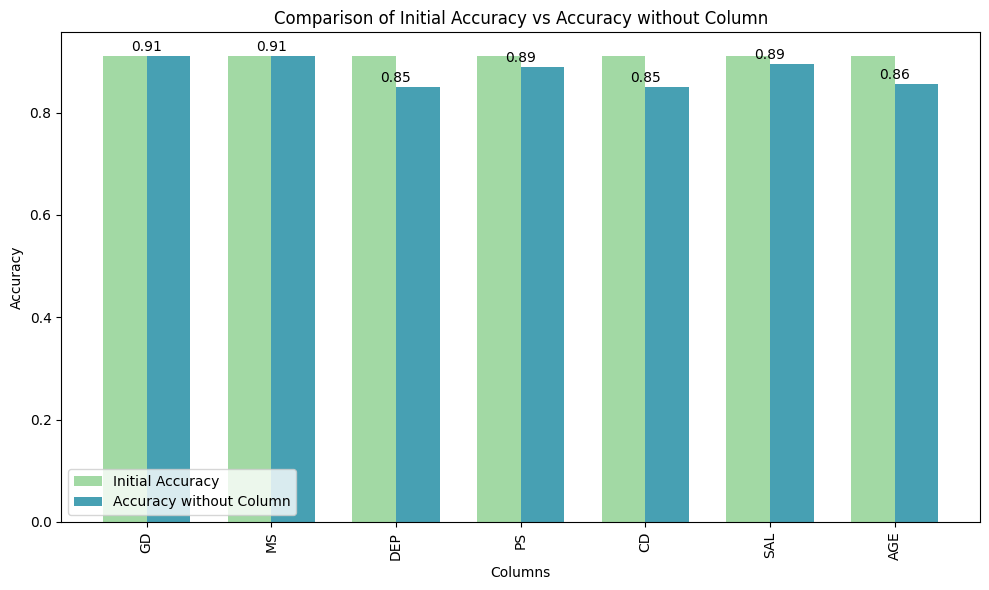

In [31]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

def ablation_study(model_class, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols):
    results = {}
    
    all_columns = discrete_cols + continuous_normal_cols + continuous_non_normal_cols

    for col in all_columns:
        print(f"Evaluating model without column: {col}")

        new_discrete_cols = [c for c in discrete_cols if c != col]
        new_continuous_normal_cols = [c for c in continuous_normal_cols if c != col]
        new_continuous_non_normal_cols = [c for c in continuous_non_normal_cols if c != col]
        
        model = model_class(new_discrete_cols, new_continuous_normal_cols, new_continuous_non_normal_cols)
        model.fit(X_train.drop(columns=[col]), y_train)
        
        y_pred = model.predict(X_test.drop(columns=[col]))
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
        
        results[col] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return results

#_____________Para modelo1_______________


model1 = CustomBayesClassifier(discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
model1.fit(X_train, y_train)

# Avaliação do modelo inicial
y_pred1 = model1.predict(X_test)
initial_performance = evaluate_model(y_test, y_pred1)
print("Initial Model Performance:")
print(f'Accuracy: {initial_performance[0]}')
print(f'Precision: {initial_performance[1]}')
print(f'Recall: {initial_performance[2]}')
print(f'F1 Score: {initial_performance[3]}')

# Análise de Ablação
ablation_results = ablation_study(CustomBayesClassifier, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
print("Ablation Study Results:")
for col, metrics in ablation_results.items():
    print(f"Without column {col}:")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1: {metrics['f1']}")

# Plotar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

columns = list(ablation_results.keys())
accuracy_values = [result['accuracy'] for result in ablation_results.values()]
recall_values = [result['recall'] for result in ablation_results.values()]

x = np.arange(len(columns))
width = 0.35

pastel_palette = sns.color_palette("Spectral")
rects1 = ax.bar(x - width/2, [initial_performance[0]] * len(columns), width, label='Initial Accuracy', color=pastel_palette[4])
rects2 = ax.bar(x + width/2, accuracy_values, width, label='Accuracy without Column', color=pastel_palette[5])

ax.set_xlabel('Columns')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Initial Accuracy vs Accuracy without Column')
ax.set_xticks(x)

# colocar percentagens nos topos das barras
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

ax.set_xticklabels(columns, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


1. Initial Model Performance:
Accuracy: 0.9111111111111111
Precision: 1.0
Recall: 0.5428571428571428
F1 Score: 0.7037037037037037


2. Ablation Study Results:
* Without column G:
  Accuracy: 0.8222222222222222
  Precision: 0.7413793103448276
  Recall: 0.7166666666666667
  F1: 0.7288135593220338
* Without column MS:
  Accuracy: 0.7944444444444444
  Precision: 0.7169811320754716
  Recall: 0.6333333333333333
  F1: 0.672566371681416
* Without column DEP:
  Accuracy: 0.7944444444444444
  Precision: 0.7090909090909091
  Recall: 0.65
  F1: 0.6782608695652174
* Without column PS:
  Accuracy: 0.8111111111111111
  Precision: 0.7407407407407407
  Recall: 0.6666666666666666
  F1: 0.7017543859649122
* Without column CD:
  Accuracy: 0.7277777777777777
  Precision: 0.6170212765957447
  Recall: 0.48333333333333334
  F1: 0.5420560747663551
* Without column AGE:
  Accuracy: 0.7888888888888889
  Precision: 0.6833333333333333
  Recall: 0.6833333333333333
  F1: 0.6833333333333333
* Without column SAL:
  Accuracy: 0.8388888888888889
  Precision: 0.8163265306122449
  Recall: 0.6666666666666666
  F1: 0.7339449541284404

Comparando com os resultados de correlação com o target --> faz senrtido
 Por exemplo resultado da DOENCA CRONICA faz sentido no ponto de vista de ser um dos pontos criticos para se ter seguro de vida  , etc...

Resultados antigo da correlação:
* idade,cd, dependentes -> os que melhor se correlacionam com o target
* genero, marital status, salario e ps-> os que menos se correlacionam com o target

Initial Model Performance:
Accuracy: 0.8833333333333333
Precision: 0.8888888888888888
Recall: 0.45714285714285713
F1 Score: 0.6037735849056604
Evaluating model without column: GD
Evaluating model without column: MS
Evaluating model without column: DEP
Evaluating model without column: PS
Evaluating model without column: CD
Evaluating model without column: SAL
Evaluating model without column: AGE
Ablation Study Results:
Without column GD:
  Accuracy: 0.8833333333333333
  Precision: 0.8888888888888888
  Recall: 0.45714285714285713
  F1: 0.6037735849056604
Without column MS:
  Accuracy: 0.8888888888888888
  Precision: 0.8947368421052632
  Recall: 0.4857142857142857
  F1: 0.6296296296296297
Without column DEP:
  Accuracy: 0.8611111111111112
  Precision: 0.7777777777777778
  Recall: 0.4
  F1: 0.5283018867924528
Without column PS:
  Accuracy: 0.8888888888888888
  Precision: 1.0
  Recall: 0.42857142857142855
  F1: 0.6
Without column CD:
  Accuracy: 0.8555555555555555
  Precision: 0.76470588235

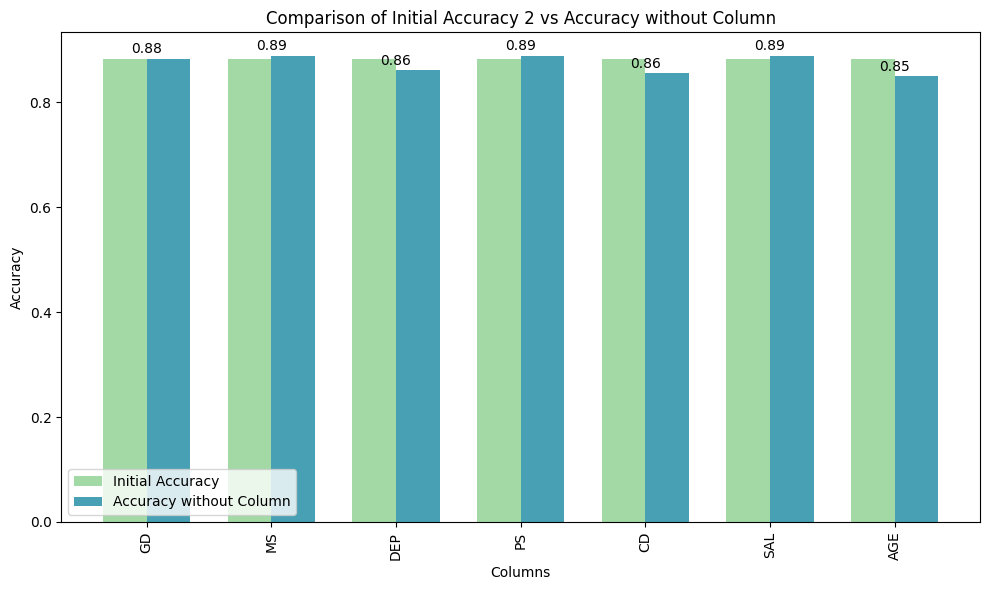

In [34]:
#_____________Para modelo2_______________

def ablation_study2(model_class, X_train, y_train, X_test, y_test, discrete_cols, continuous_cols):
    results = {}
    
    all_columns = discrete_cols + continuous_cols

    for col in all_columns:
        print(f"Evaluating model without column: {col}")

        new_discrete_cols = [c for c in discrete_cols if c != col]
        new_continuous_cols = [c for c in continuous_cols if c != col]
        
        
        model = model_class(new_discrete_cols, new_continuous_cols)
        model.fit(X_train.drop(columns=[col]), y_train)
        
        y_pred = model.predict(X_test.drop(columns=[col]))
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
        
        results[col] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return results



model2 = GeneralHybridBayesClassifier(discrete_cols, continuous_cols)
model2.fit(X_train, y_train)

# Avaliação do modelo 2
y_pred2 = model2.predict(X_test)
initial_performance = evaluate_model(y_test, y_pred2)
print("Initial Model Performance:")
print(f'Accuracy: {initial_performance[0]}')
print(f'Precision: {initial_performance[1]}')
print(f'Recall: {initial_performance[2]}')
print(f'F1 Score: {initial_performance[3]}')

# Análise de Ablação
ablation_results2 = ablation_study2(GeneralHybridBayesClassifier, X_train, y_train, X_test, y_test, discrete_cols, continuous_cols)

print("Ablation Study Results:")
for col, metrics in ablation_results2.items():
    print(f"Without column {col}:")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1: {metrics['f1']}")

# Plotar gráfico de barras

fig, ax = plt.subplots(figsize=(10, 6))

columns = list(ablation_results2.keys())
accuracy_values = [result['accuracy'] for result in ablation_results2.values()]
recall_values = [result['recall'] for result in ablation_results2.values()]

x = np.arange(len(columns))
width = 0.35

pastel_palette = sns.color_palette("Spectral")
rects1 = ax.bar(x - width/2, [initial_performance[0]] * len(columns), width, label='Initial Accuracy', color=pastel_palette[4])
rects2 = ax.bar(x + width/2, accuracy_values, width, label='Accuracy without Column', color=pastel_palette[5])

ax.set_xlabel('Columns')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Initial Accuracy 2 vs Accuracy without Column')
ax.set_xticks(x)

# colocar percentagens nos topos das barras

for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

ax.set_xticklabels(columns, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()

* Initial Model Performance:
Accuracy: 0.8833333333333333
Precision: 0.8888888888888888
Recall: 0.45714285714285713
F1 Score: 0.6037735849056604

Ablation Study Results:
* Without column GD:
  Accuracy: 0.8833333333333333
  Precision: 0.8858024691358024
  Recall: 0.7216748768472906
  F1: 0.767684838055436
* Without column MS:
  Accuracy: 0.8888888888888888
  Precision: 0.8914677999346192
  Recall: 0.7359605911330049
  F1: 0.7821350762527233
* Without column DEP:
  Accuracy: 0.8611111111111112
  Precision: 0.8240740740740741
  Recall: 0.6862068965517241
  F1: 0.7234343310183762
* Without column PS:
  Accuracy: 0.8888888888888888
  Precision: 0.9393939393939394
  Recall: 0.7142857142857143
  F1: 0.7677419354838709
* Without column CD:
  Accuracy: 0.8555555555555555
  Precision: 0.8148682785997834
  Recall: 0.6719211822660098
  F1: 0.7077922077922079
* Without column SAL:
  Accuracy: 0.8888888888888888
  Precision: 0.9393939393939394
  Recall: 0.7142857142857143
  F1: 0.7677419354838709
* Without column AGE:
  Accuracy: 0.85
  Precision: 0.8048780487804879
  Recall: 0.6576354679802956
  F1: 0.6916047972587094


Resultados antigo da correlação:
* idade,cd, dependentes -> os que melhor se correlacionam com o target
* genero, marital status, salario e ps-> os que menos se correlacionam com o target

Performance do Modelo 3:
Accuracy: 0.8444444444444444
Precision: 0.7692307692307693
Recall: 0.2857142857142857
F1 Score: 0.4166666666666667
Evaluating model without column: GD
Evaluating model without column: MS
Evaluating model without column: DEP
Evaluating model without column: PS
Evaluating model without column: CD
Evaluating model without column: SAL
Evaluating model without column: AGE
Ablation Study Results for Model 3:
Without column GD:
  Accuracy: 0.9111111111111111
  Precision: 1.0
  Recall: 0.5428571428571428
  F1: 0.7037037037037037
Without column MS:
  Accuracy: 0.9111111111111111
  Precision: 1.0
  Recall: 0.5428571428571428
  F1: 0.7037037037037037
Without column DEP:
  Accuracy: 0.85
  Precision: 0.7222222222222222
  Recall: 0.37142857142857144
  F1: 0.49056603773584906
Without column PS:
  Accuracy: 0.8888888888888888
  Precision: 1.0
  Recall: 0.42857142857142855
  F1: 0.6
Without column CD:
  Accuracy: 0.85
  Precision: 0.7222222222222222
  Recall: 0.371428571428571

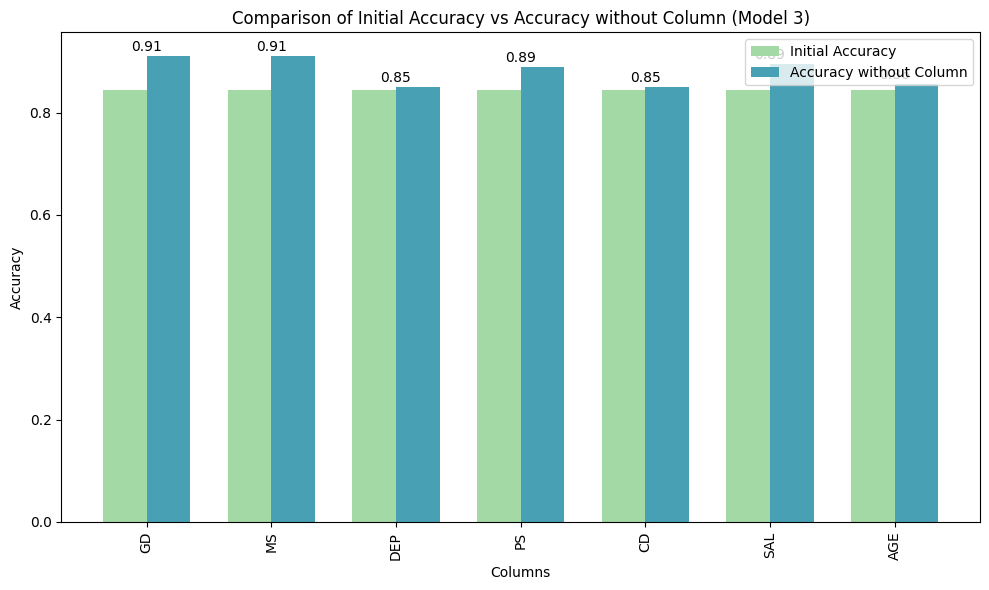

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Função de estudo de ablação
def ablation_study(model_class, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols):
    results = {}
    
    all_columns = discrete_cols + continuous_normal_cols + continuous_non_normal_cols

    for col in all_columns:
        print(f"Evaluating model without column: {col}")

        new_discrete_cols = [c for c in discrete_cols if c != col]
        new_continuous_normal_cols = [c for c in continuous_normal_cols if c != col]
        new_continuous_non_normal_cols = [c for c in continuous_non_normal_cols if c != col]
        
        model = model_class(new_discrete_cols, new_continuous_normal_cols, new_continuous_non_normal_cols)
        model.fit(X_train.drop(columns=[col]), y_train)
        
        y_pred = model.predict(X_test.drop(columns=[col]))
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
        
        results[col] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return results





# Avaliar performance do modelo 3
print("Performance do Modelo 3:")
accuracy_model3, precision_model3, recall_model3, f1_model3 = evaluate_model(y_test, y_pred3)
print(f'Accuracy: {accuracy_model3}')
print(f'Precision: {precision_model3}')
print(f'Recall: {recall_model3}')
print(f'F1 Score: {f1_model3}')

# Análise de Ablação para o Modelo 3
ablation_results = ablation_study(CustomBayesClassifier, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
print("Ablation Study Results for Model 3:")
for col, metrics in ablation_results.items():
    print(f"Without column {col}:")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1: {metrics['f1']}")

# Plotar gráfico de barras para comparar as acurácias
fig, ax = plt.subplots(figsize=(10, 6))

columns = list(ablation_results.keys())
accuracy_values = [result['accuracy'] for result in ablation_results.values()]
recall_values = [result['recall'] for result in ablation_results.values()]

x = np.arange(len(columns))
width = 0.35

pastel_palette = sns.color_palette("Spectral")
rects1 = ax.bar(x - width/2, [accuracy_model3] * len(columns), width, label='Initial Accuracy', color=pastel_palette[4])
rects2 = ax.bar(x + width/2, accuracy_values, width, label='Accuracy without Column', color=pastel_palette[5])

ax.set_xlabel('Columns')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Initial Accuracy vs Accuracy without Column (Model 3)')
ax.set_xticks(x)

# colocar percentagens nos topos das barras
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

ax.set_xticklabels(columns, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


* Performance do Modelo 3:
Accuracy: 0.8888888888888888
Precision: 0.8947368421052632
Recall: 0.4857142857142857
F1 Score: 0.6296296296296297

* Without column GD:
  Accuracy: 0.9111111111111111
  Precision: 1.0
  Recall: 0.5428571428571428
  F1: 0.7037037037037037
* Without column MS:
  Accuracy: 0.9111111111111111
  Precision: 1.0
  Recall: 0.5428571428571428
  F1: 0.7037037037037037
* Without column DEP:
  Accuracy: 0.85
  Precision: 0.7222222222222222
  Recall: 0.37142857142857144
  F1: 0.49056603773584906
* Without column PS:
  Accuracy: 0.8888888888888888
  Precision: 1.0
  Recall: 0.42857142857142855
  F1: 0.6
* Without column CD:
  Accuracy: 0.85
  Precision: 0.7222222222222222
  Recall: 0.37142857142857144
  F1: 0.49056603773584906
* Without column SAL:
  Accuracy: 0.8944444444444445
  Precision: 1.0
  Recall: 0.45714285714285713
  F1: 0.6274509803921569
* Without column AGE:
  Accuracy: 0.8555555555555555
  Precision: 0.8
  Recall: 0.34285714285714286
  F1: 0.48

Resultados antigo da correlação:
* idade,cd, dependentes -> os que melhor se correlacionam com o target
* genero, marital status, salario e ps-> os que menos se correlacionam com o target

### II.c Variáveis contínuas vs. Discretas

Accuracy Inicial: 0.9111111111111111
Performance usando apenas variáveis discretas:
Accuracy: 0.8444444444444444
Precision: 0.7692307692307693
Recall: 0.2857142857142857
F1 Score: 0.4166666666666667
None
Performance usando apenas variáveis contínuas:
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.14285714285714285
F1 Score: 0.25
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.8111111111111111
Precision: 0.6
Recall: 0.08571428571428572
F1 Score: 0.15
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.8
Precision: 0.3333333333333333
Recall: 0.02857142857142857
F1 Score: 0.05263157894736842
None


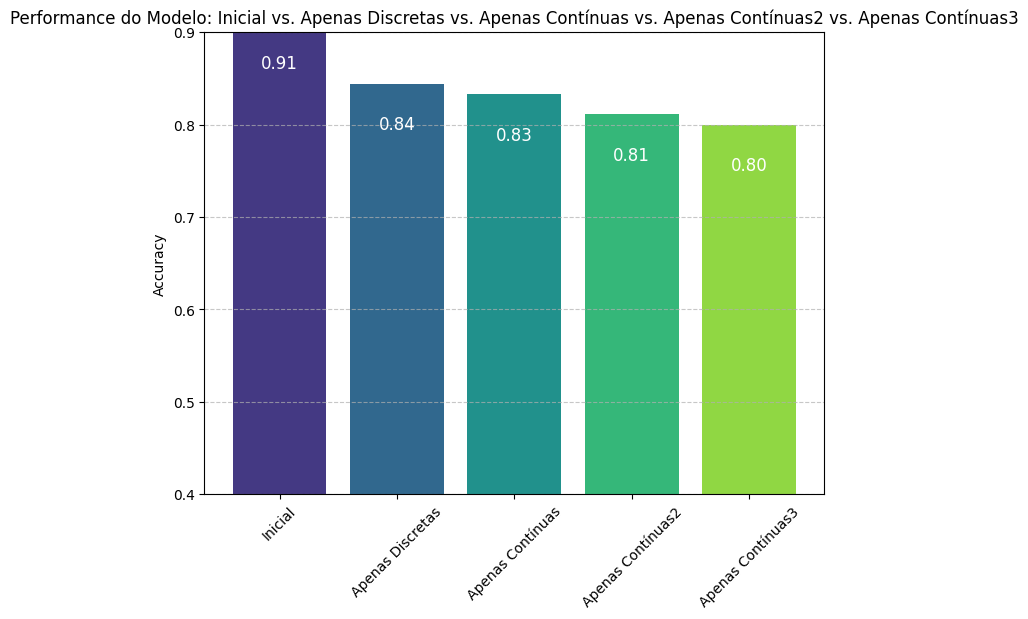

In [36]:
# Avaliação do modelo inicial
initial_performance = evaluate_model(y_test, y_pred1)
if initial_performance is not None:
    accuracy_inicial = initial_performance[0]
    print(f'Accuracy Inicial: {accuracy_inicial}')
else:
    print('Erro: Initial performance retornou None.')

def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

# Performance usando apenas variáveis discretas
model3 = CustomBayesClassifier(discrete_cols, None, None)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("Performance usando apenas variáveis discretas:")
print(evaluate_model(y_test, y_pred3))
accuracy_discrete = accuracy_score(y_test, y_pred3)

# Performance usando apenas variáveis contínuas
model4 = CustomBayesClassifier(None, continuous_normal_cols, continuous_non_normal_cols)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print("Performance usando apenas variáveis contínuas:",)
print(evaluate_model(y_test, y_pred4))
accuracy_continuous = accuracy_score(y_test, y_pred4)

# Performance usando apenas variáveis contínuas modelo 2
model5 = GeneralHybridBayesClassifier(None, continuous_cols)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred5))
accuracy_continuous2 = accuracy_score(y_test, y_pred5)


# Performance usando apenas variáveis contínuas modelo 3
model6 = CustomBayesClassifier(None, continuous_cols, None)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred6))
accuracy_continuous3 = accuracy_score(y_test, y_pred6)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')


# Criar o gráfico de barras
labels = ['Inicial', 'Apenas Discretas', 'Apenas Contínuas', 'Apenas Contínuas2', 'Apenas Contínuas3']
accuracies = [accuracy_inicial, accuracy_discrete, accuracy_continuous, accuracy_continuous2, accuracy_continuous3]
#cores viridis
colors = sns.color_palette('viridis', n_colors=len(labels))

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=colors)

# Adicionar texto nas barras com os valores
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{accuracy:.2f}', ha='center', color='white', fontsize=12)

plt.ylim(0.4, 0.90)  # Limitar o eixo y para melhor visualização das diferenças
plt.ylabel('Accuracy')
plt.title('Performance do Modelo: Inicial vs. Apenas Discretas vs. Apenas Contínuas vs. Apenas Contínuas2 vs. Apenas Contínuas3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# colocar labels na diagonal
plt.xticks(rotation=45)

plt.show()

Accuracy: 0.9111111111111111
Precision: 1.0
Recall: 0.5428571428571428
F1 Score: 0.7037037037037037
Erro: Initial performance retornou None.
Performance usando apenas variáveis discretas:
Accuracy: 0.8444444444444444
Precision: 0.7692307692307693
Recall: 0.2857142857142857
F1 Score: 0.4166666666666667
None
Performance usando apenas variáveis contínuas:
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.14285714285714285
F1 Score: 0.25
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.8111111111111111
Precision: 0.6
Recall: 0.08571428571428572
F1 Score: 0.15
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.8
Precision: 0.3333333333333333
Recall: 0.02857142857142857
F1 Score: 0.05263157894736842
None


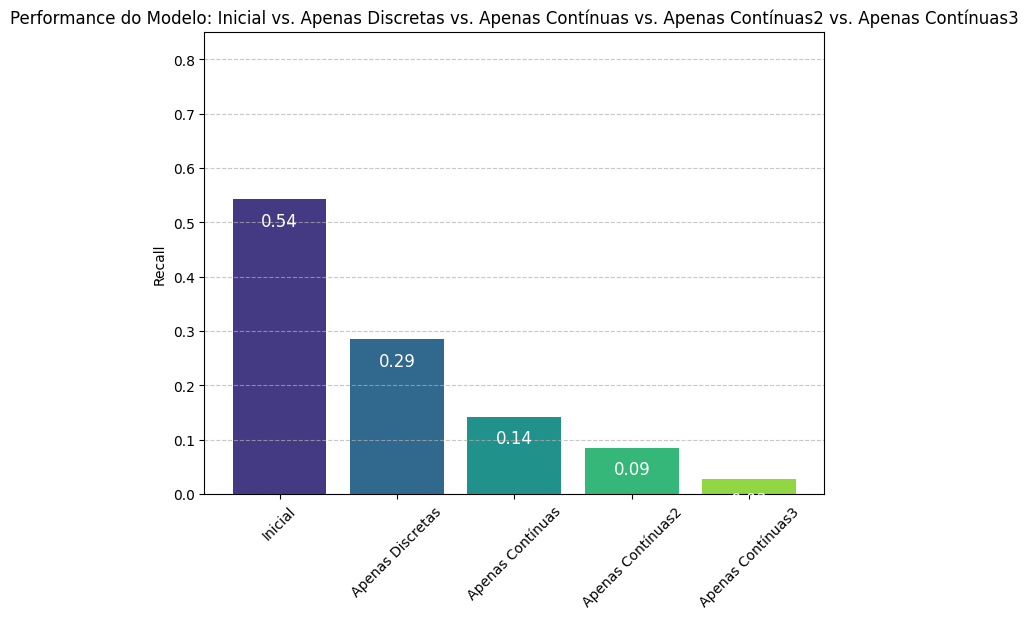

In [37]:
# Avaliação do modelo inicial
initial_performance = evaluate_model(y_test, y_pred1)
if initial_performance is not None:
    accuracy_inicial = initial_performance[0]
    print(f'Accuracy Inicial: {accuracy_inicial}')
else:
    print('Erro: Initial performance retornou None.')

def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

# Performance usando apenas variáveis discretas
model3 = CustomBayesClassifier(discrete_cols, None, None)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("Performance usando apenas variáveis discretas:")
print(evaluate_model(y_test, y_pred3))
recall_discrete = recall_score(y_test, y_pred3)

# Performance usando apenas variáveis contínuas
model4 = CustomBayesClassifier(None, continuous_normal_cols, continuous_non_normal_cols)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print("Performance usando apenas variáveis contínuas:",)
print(evaluate_model(y_test, y_pred4))
recall_continuous = recall_score(y_test, y_pred4)

# Performance usando apenas variáveis contínuas modelo 2
model5 = GeneralHybridBayesClassifier(None, continuous_cols)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred5))
recall_continuous2 = recall_score(y_test, y_pred5)


# Performance usando apenas variáveis contínuas modelo 3
model6 = CustomBayesClassifier(None, continuous_cols, None)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred6))
recall_continuous3 = recall_score(y_test, y_pred6)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')


# Criar o gráfico de barras
labels = ['Inicial', 'Apenas Discretas', 'Apenas Contínuas', 'Apenas Contínuas2', 'Apenas Contínuas3']
recall = [0.542857, recall_discrete, recall_continuous, recall_continuous2, recall_continuous3]
#cores viridis
colors = sns.color_palette('viridis', n_colors=len(labels))

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, recall, color=colors)

# Adicionar texto nas barras com os valores
for bar, recalls in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{recalls:.2f}', ha='center', color='white', fontsize=12)

plt.ylim(0, 0.85)  # Limitar o eixo y para melhor visualização das diferenças
plt.ylabel('Recall')
plt.title('Performance do Modelo: Inicial vs. Apenas Discretas vs. Apenas Contínuas vs. Apenas Contínuas2 vs. Apenas Contínuas3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# colocar labels na diagonal
plt.xticks(rotation=45)

plt.show()